In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import math
import random

In [2]:
# Coordinates of boundaries of area of Lower Silesian Voivodeship

NORTH =  51.8047222
EAST = 14.8172222
SOUTH = 50.0961111
WEST = 17.795

# Population
POPULATION = 2901200
DEGREE_URBANIZATION = 0.606
RATIO_WITH_SALARY_MORE_10K = 0.062
NUMBER_OF_HOUSEHOLDS = int(RATIO_WITH_SALARY_MORE_10K * DEGREE_URBANIZATION * POPULATION)

# Rectangular network:
HEIGHT = NORTH - SOUTH
WIDTH = WEST - EAST
NUMBER_OF_POINTS = NUMBER_OF_HOUSEHOLDS

NUMBER_OF_NODES_HEIGHT = int(math.sqrt(HEIGHT/WIDTH * NUMBER_OF_POINTS))
NUMBER_OF_NODES_WIDTH = int(NUMBER_OF_POINTS/NUMBER_OF_NODES_HEIGHT)

LENGTH_HEIGHT = HEIGHT/NUMBER_OF_NODES_HEIGHT
LENGTH_WIDTH = WIDTH/NUMBER_OF_NODES_WIDTH

#### Number of agents (households)

In [3]:
NUMBER_OF_HOUSEHOLDS

109003

## Rectangular network as neighbourhood

In [4]:
COORDINATES = []
for y in range(NUMBER_OF_NODES_HEIGHT):
    for x in range(NUMBER_OF_NODES_WIDTH):
        COORDINATES.append((x*LENGTH_WIDTH, y*LENGTH_HEIGHT))
        
X_COORDINATES = [x[0] for x in COORDINATES]
Y_COORDINATES = [x[1] for x in COORDINATES]

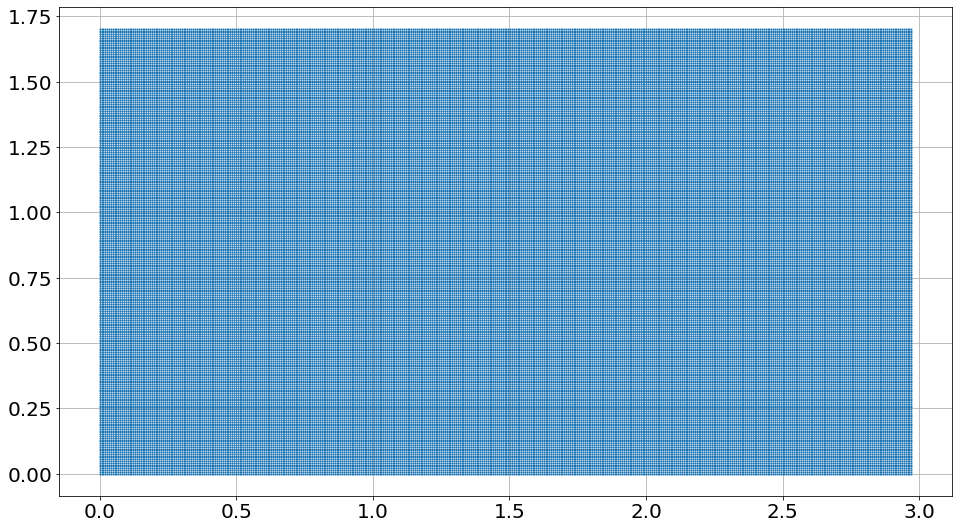

In [5]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(X_COORDINATES, Y_COORDINATES, '.', markersize=2)
plt.show()

In [6]:
G = nx.grid_2d_graph(NUMBER_OF_NODES_HEIGHT, NUMBER_OF_NODES_WIDTH)
G = nx.convert_node_labels_to_integers(G)

In [7]:
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = COORDINATES[i]

In [8]:
NUMBER_OF_NODES = NUMBER_OF_NODES_HEIGHT*NUMBER_OF_NODES_WIDTH

In [9]:
NUMBER_OF_NODES

109000

## Number of electric vehicles

In [10]:
NUMBER_OF_ELECTRIC_VEHICLES_IN_POLAND = 2021
RATIO_OF_POPULATION_IN_LOWER_SILESIAN = POPULATION/37950000
RATIO_OF_ELECTRIC_VEHICLES = NUMBER_OF_ELECTRIC_VEHICLES_IN_POLAND*RATIO_OF_POPULATION_IN_LOWER_SILESIAN

In [11]:
NUMBER_OF_ELECTRIC_VEHICLES = int(RATIO_OF_ELECTRIC_VEHICLES)

In [12]:
NUMBER_OF_ELECTRIC_VEHICLES

154

## Social interactions

In [13]:
K = nx.barabasi_albert_graph(NUMBER_OF_NODES, 1)
node_mapping = dict(zip(K.nodes(), sorted(K.nodes(), key=lambda k: random.random())))
K = nx.relabel_nodes(K, node_mapping)

## Temporary connection between nodes

In [14]:
K_temp = nx.fast_gnp_random_graph(len(G.nodes()), 0.001)

## Social media influence

Star graph and center node should be treated as "Star" (information from different type of media e.g. TV, Internet)

In [15]:
L = nx.star_graph(len(G))
pos[len(G.nodes())] = (-0.1, -0.1)
mapping = {0:len(G), len(G):0}
L = nx.relabel_nodes(L, mapping)

## Networks characteristics

#### Neighbourhood network

In [16]:
len(G.nodes())

109000

In [17]:
len(G.edges())

217314

## Pickle

#### Networks:

In [18]:
nx.write_gpickle(G, 'network_neighbourhood.pickle')
nx.write_gpickle(K, 'social_neighbourhood.pickle')
nx.write_gpickle(L, 'social_media.pickle')